# Notebook 3: Dealing with Multicolinearity

Before trying to change the model, we want to reduce the data set we are using. A common heuristic recommends 10 data points per feature for regression. Additionaly, we have similar and thus highly correlated features. Therefore, we decided to reduce the number of features from 120 to 15/30. 

We tried two different criteria for selecting remaining features: the total amount of correlation and the Variance inflation factor (VIF).

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import corr_utils as corr_utils
from src import ana_utils as ana_utils
import collections
import scipy.stats


#np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression

np.random.seed(7)

Import datasets that were preprocessed in Notebook 1

In [13]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

### Sighting Correlation 

First, we wanted to get a first impression of the amount of multicolinearity present in the data. Therefore, we created a correlation matrix.

Text(0.5, 1.0, 'Correlation Matrix')

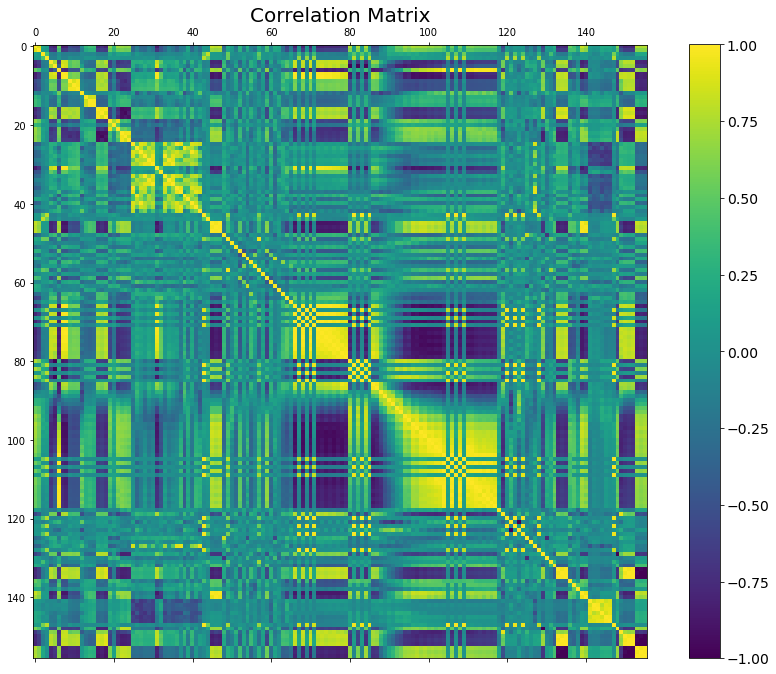

In [14]:
indicator_corr = wb_data.corr(method="pearson")

f = plt.figure(figsize=(15, 11))
plt.matshow(indicator_corr, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)

### Pearson's r indicator removal

Since we have multiple cluster of correlated features, we wondered what these clusters are. We build a function that returns a dict of indicators and their total correlation measured by Pearson's r (sum of absolute correlation coefficients across all the other indicators). 

In [15]:
corr_dict = ana_utils.corr_counter(indicator_corr)
corr_dict_sorted = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True) 
#corr_dict_sorted


Since we do not want to remove a complete cluster, which could happen if we just threw out a big chunk of the correlated data, we decided on an iterative procedure that removes indicators one-by-one until the data is reduced to the desired number of indicators.

In [17]:
wb_data_pear_reduced_15 = corr_utils.pearsons_reduction(wb_data, 15)
wb_data_pear_reduced_30 = corr_utils.pearsons_reduction(wb_data, 30)

In [18]:
least_squares = sklearn.linear_model.LinearRegression()
test_size = 30

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=least_squares, n=2000, data=wb_data_pear_reduced_15, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (15 indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=least_squares, n=2000, data=wb_data_pear_reduced_30, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (30 indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])

Mean loss (15 indicators): 3.4082680913433925
The average size of the first ten coefficients (reduced set of indicators): [ 2.729   3.7162  1.65    1.3085 -5.7019 -3.5075 -3.6828  0.0603  7.7298
  1.219 ]
Mean loss (30 indicators): 1.1049722784900655
The average size of the first ten coefficients (reduced set of indicators): [ 1.5952  0.3602  1.2814  0.4963 -3.0246 -4.7735  0.833  -0.52   -7.9286
  1.4915]


#TODO evaluate and compare results

### VIF indicator removal

Our second approach instead uses the variance inflation factor to, again, iteratively remove indicators from the data set.

In [19]:
wb_data_vif_reduced_15 = corr_utils.vif_reduction(wb_data, 1, 15)
wb_data_vif_reduced_30 = corr_utils.vif_reduction(wb_data, 1, 30)

/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
/home/christian/Desktop/Data Literacy/Data-Literacy-project/src/corr_utils.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1

In [ ]:
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=least_squares, n=2000, data=wb_data_vif_reduced_15, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (15 indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=least_squares, n=2000, data=wb_data_vif_reduced_30, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (30 indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])

## Export reduced datasets
Lastly, we export our reduced datasets so we can test them on other models later on.

In [ ]:
wb_data_pear_reduced_15.to_csv("data/wb_data_pear_reduced_15.csv", index=False)
wb_data_pear_reduced_30.to_csv("data/wb_data_pear_reduced_30.csv", index=False)
wb_data_vif_reduced_15.to_csv("data/wb_data_vif_reduced_15.csv", index=False)
wb_data_vif_reduced_30.to_csv("data/wb_data_vif_reduced_30.csv", index=False)